### Climatological map for each month

Here, I have calculated 50 year average from 1961 to 2010 for temperature for each month. Thus, we get a climatological map for all the 12 months over this region.

/tmp/ipykernel_984315/1916668535.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


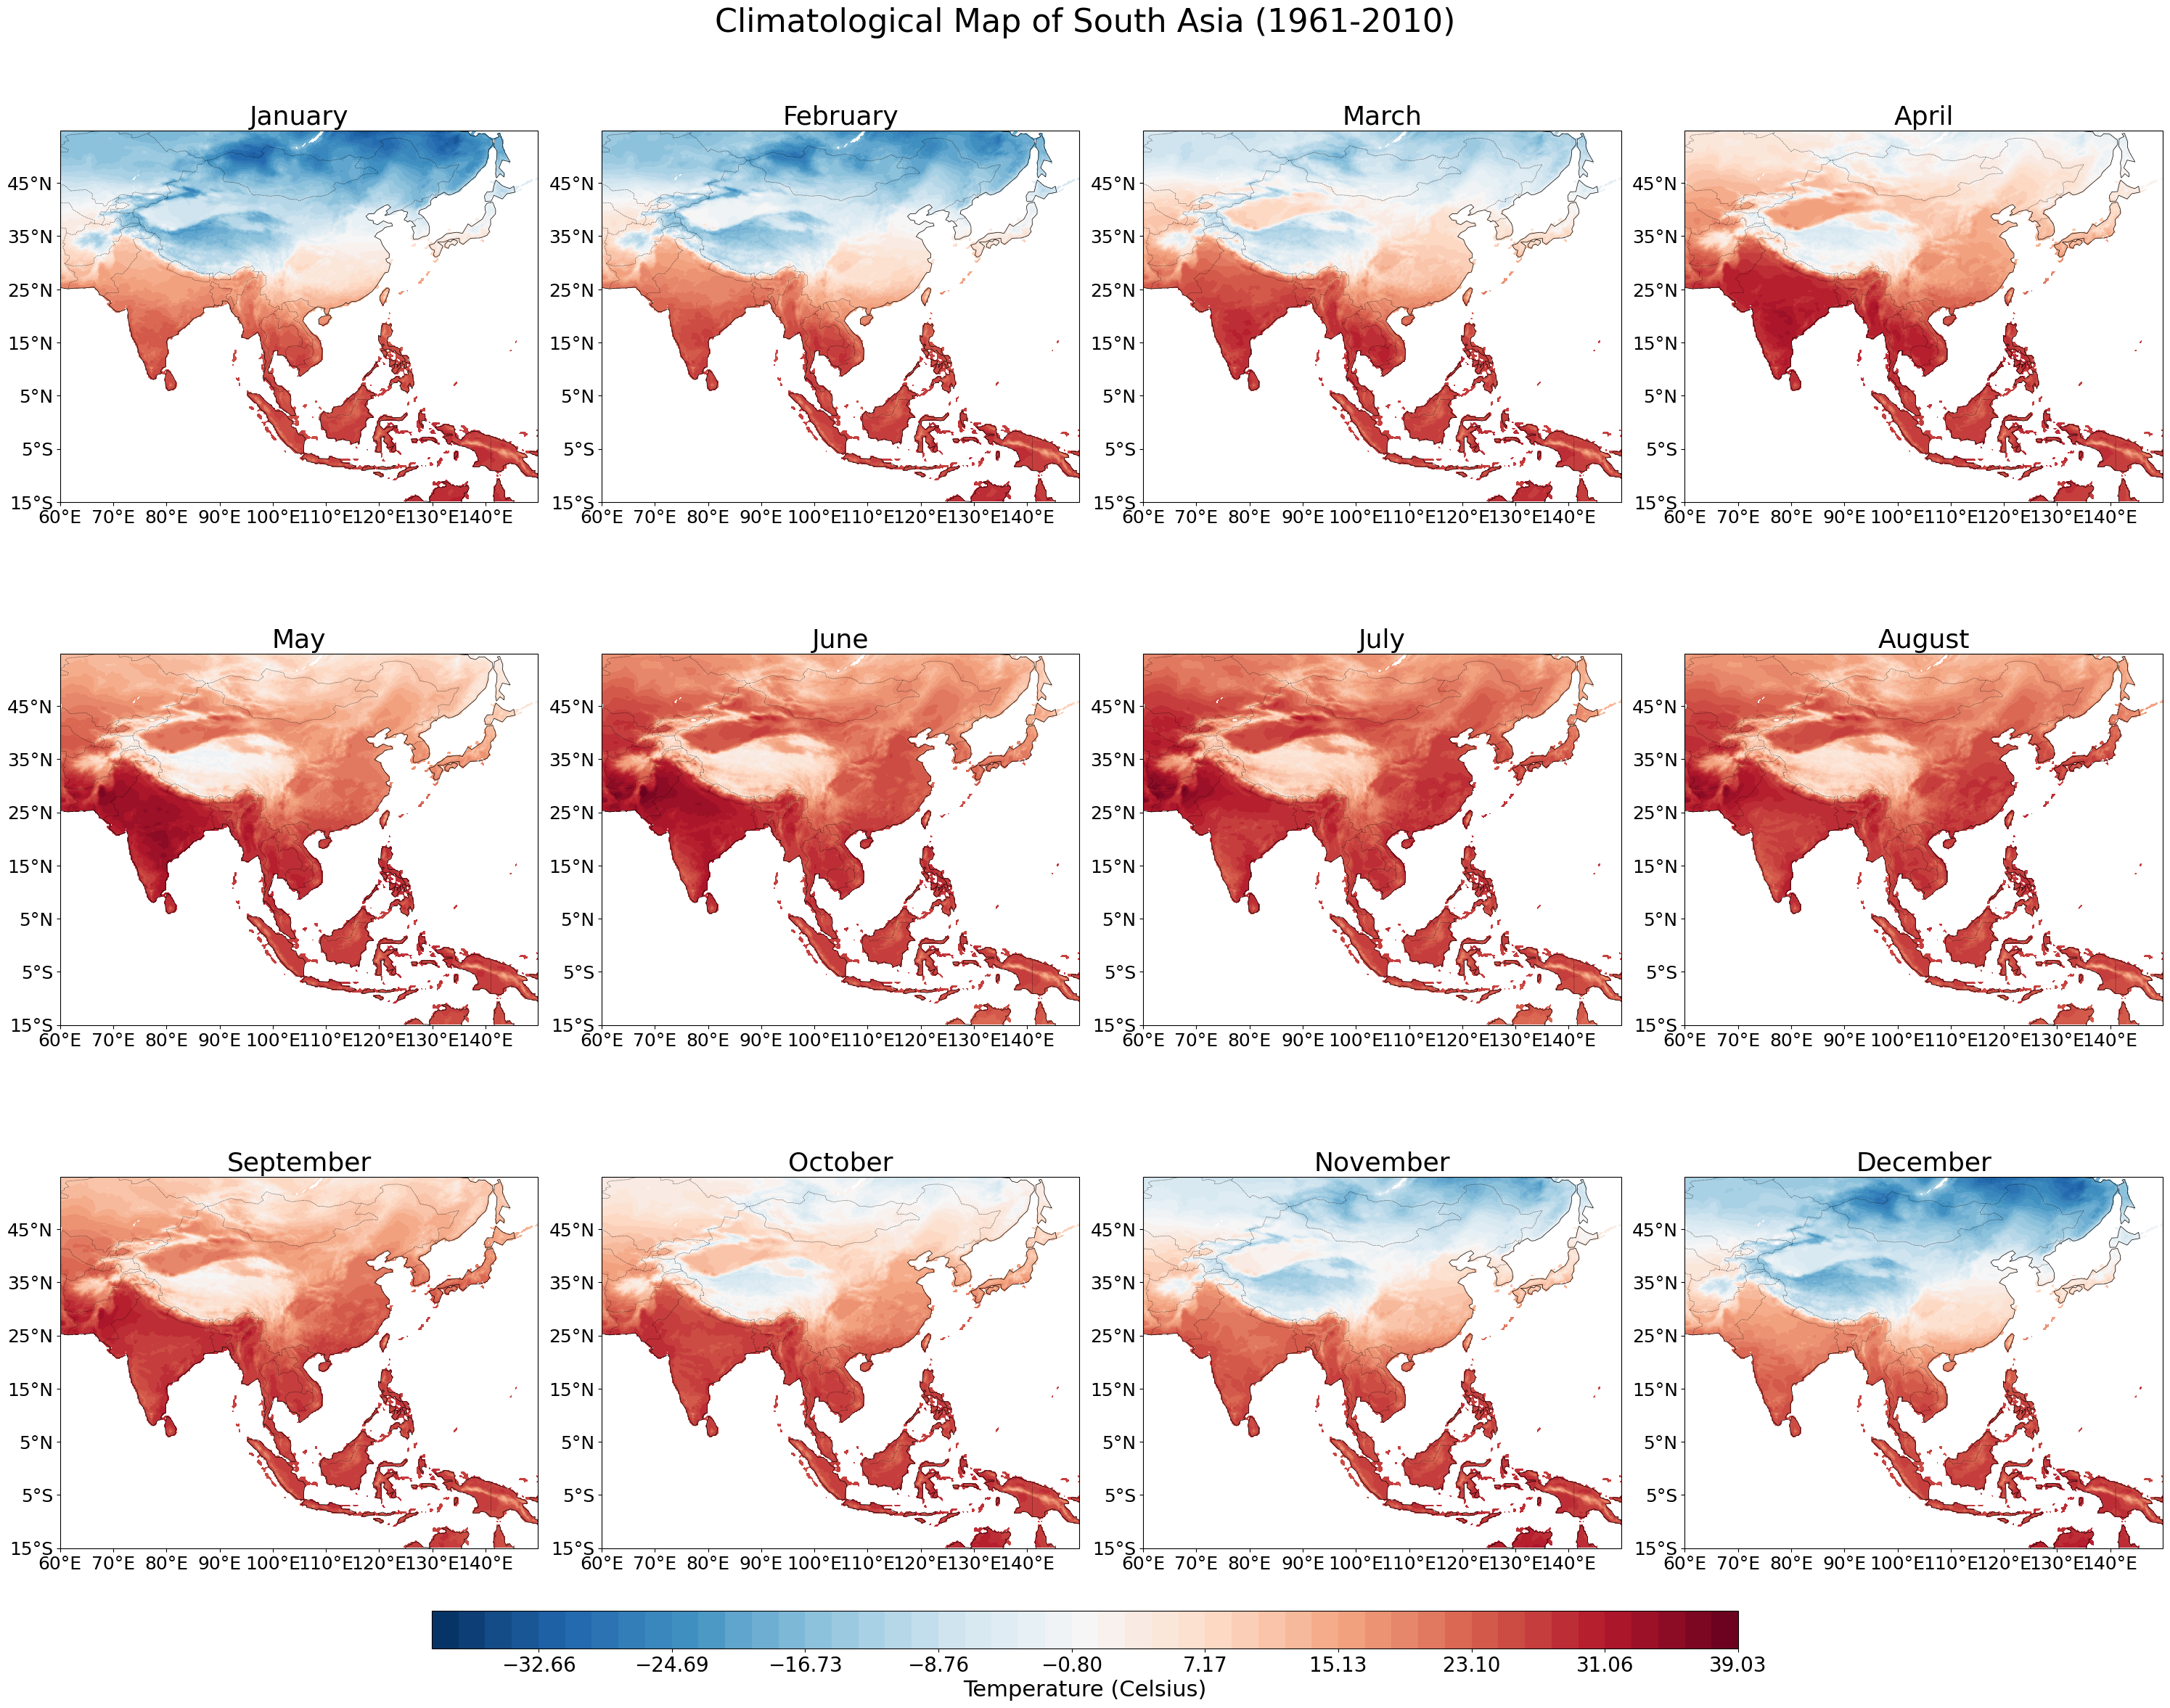

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def extract_monthly_data(filename):
    ds = xr.open_dataset(filename)
    monthly_data = ds['tave'].groupby('time.month').mean('time')
    return monthly_data

def plot_monthly_data(climatology, month, ax, vmin, vmax, levels):
    lons, lats = np.meshgrid(climatology['lon'], climatology['lat'])
    cs = ax.contourf(lons, lats, climatology.sel(month=month), levels=levels, cmap='RdBu_r', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.set_title(month_name(month), fontsize=26)

    # Set longitude labels with larger font size
    lon_formatter = plt.FuncFormatter(lambda x, _: f"{int(x):d}°E" if x >= 0 else f"{int(-x):d}°W")
    ax.set_xticks(np.arange(np.floor(np.min(climatology['lon'])), np.ceil(np.max(climatology['lon'])), 10), crs=ccrs.PlateCarree())
    ax.set_xticklabels([lon_formatter(tick, None) for tick in np.arange(np.floor(np.min(climatology['lon'])), np.ceil(np.max(climatology['lon'])), 10)], fontsize=18)

    # Set latitude labels with larger font size
    lat_formatter = plt.FuncFormatter(lambda x, _: f"{int(x):d}°N" if x >= 0 else f"{int(-x):d}°S")
    ax.set_yticks(np.arange(np.floor(np.min(climatology['lat'])), np.ceil(np.max(climatology['lat'])), 10), crs=ccrs.PlateCarree())
    ax.set_yticklabels([lat_formatter(tick, None) for tick in np.arange(np.floor(np.min(climatology['lat'])), np.ceil(np.max(climatology['lat'])), 10)], fontsize=18)

    return cs

def month_name(month_num):
    import calendar
    return calendar.month_name[month_num]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 26), subplot_kw={'projection': ccrs.PlateCarree()})

all_data = []
for year in range(1961, 2011):
    filename = f"APHRO_MA_TAVE_025deg_V1808.{year}.nc.nc"
    all_data.append(extract_monthly_data(filename))

combined_data = xr.concat(all_data, dim='year')
climatology = combined_data.mean(dim='year')

vmax = np.abs(climatology.max())
vmin = -vmax

levels = np.linspace(vmin, vmax, 50)

for month, ax in zip(range(1, 13), axes.ravel()):
    cs = plot_monthly_data(climatology, month, ax, vmin, vmax, levels)

cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
cb = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cb.ax.tick_params(labelsize=20)
cb.set_label('Temperature (Celsius)', size=22)

fig.suptitle("Climatological Map of South Asia (1961-2010)", fontsize=32, y=0.92)

plt.subplots_adjust(top=0.88, hspace=0.05, wspace=0.1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save and show the plot
plt.savefig('climatological_map.png', dpi=300, bbox_inches='tight')

plt.show()